#Fake News Detection

Import libraries

In [272]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Load the dataset

In [273]:
# load the dataset

train_df = pd.read_csv('/content/train[1].csv')
train_df

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
...,...,...
10235,There are a larger number of shark attacks in ...,True
10236,Democrats have now become the party of the [At...,True
10237,Says an alternative to Social Security that op...,True
10238,On lifting the U.S. Cuban embargo and allowing...,False


Data Exploration

In [274]:
# Headings

train_df.head(15)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [275]:
# Last rows

train_df.tail(15)

,Statement,Label
10225,The Republican Party lost 1.1 million register...,True
10226,The proudest accomplishment (of my tenure) was...,True
10227,"Recently though, the media has reported on tho...",False
10228,Stopped by Smiley Cookie to pick up some great...,False
10229,"Mike Trainor...still owes $250,000 to the state.",True
10230,The Supreme Courts views are radically out of ...,False
10231,"When it comes to the state deficit, Wisconsin ...",True
10232,Eighty percent of the net new jobs created in ...,True
10233,Mayor Fung wants to punish our childrens educa...,False
10234,"Under the ruling of the Supreme Court, any lob...",True


In [276]:
# Info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


In [277]:
# Describe

train_df.describe()

,Statement,Label
count,10240,10240
unique,10223,2
top,On changing the rules for filibusters on presi...,True
freq,3,5752


In [278]:
#Shape

train_df.shape

(10240, 2)

In [279]:
# getting labels

labels=train_df.Label
labels

0        False
1         True
2         True
3        False
4         True
         ...  
10235     True
10236     True
10237     True
10238    False
10239    False
Name: Label, Length: 10240, dtype: bool

In [280]:
# getting Statement

train_df['Statement'][2188]

'Says 94 percent of Wisconsin employers think the state is heading in the right direction and a majority say they will grow their companies in 2012.'

In [281]:
# removing null values

train_df = train_df.dropna()
train_df

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
...,...,...
10235,There are a larger number of shark attacks in ...,True
10236,Democrats have now become the party of the [At...,True
10237,Says an alternative to Social Security that op...,True
10238,On lifting the U.S. Cuban embargo and allowing...,False


In [282]:
# data quality check

def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


**Data Visualization**

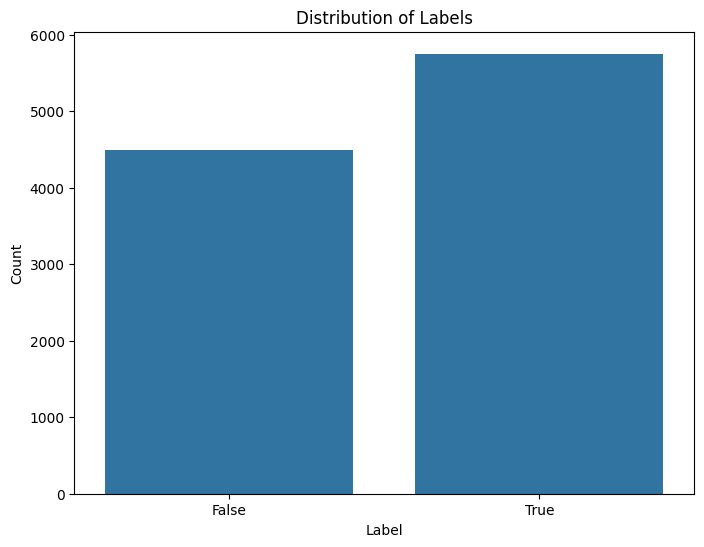

In [283]:
# Bar plot

plt.figure(figsize=(8, 6))
sb.countplot(x='Label', data=train_df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**Training the Dataset**

In [284]:
# Splitting data into features and labels

X = train_df['Statement']
y = train_df['Label']
X, y

(0        Says the Annies List political group supports ...
 1        When did the decline of coal start? It started...
 2        Hillary Clinton agrees with John McCain "by vo...
 3        Health care reform legislation is likely to ma...
 4        The economic turnaround started at the end of ...
                                ...                        
 10235    There are a larger number of shark attacks in ...
 10236    Democrats have now become the party of the [At...
 10237    Says an alternative to Social Security that op...
 10238    On lifting the U.S. Cuban embargo and allowing...
 10239    The Department of Veterans Affairs has a manua...
 Name: Statement, Length: 10240, dtype: object,
 0        False
 1         True
 2         True
 3        False
 4         True
          ...  
 10235     True
 10236     True
 10237     True
 10238    False
 10239    False
 Name: Label, Length: 10240, dtype: bool)

In [285]:
# Initialize TF-IDF Vectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

In [286]:
# Fit and transform the data

X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf

<10240x11915 sparse matrix of type '<class 'numpy.float64'>'
	with 101536 stored elements in Compressed Sparse Row format>

In [287]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(550     We are now, for the first time ever, energy in...
 7231    Were not engaged in nation-building in Afghani...
 2515    Because of President Barack Obamas failure to ...
 4466    New carbon regulations will increase electric ...
 211     Obamacare is the biggest tax increase in Ameri...
                               ...                        
 5734    When I took office, the deficit was nearly 10 ...
 5191                      On the mosque near ground zero.
 5390    Louie Gohmert of Texas blamed the mass shootin...
 860     The Governor did not consult members of his ow...
 7270    A telecom bill could keep the State Corporatio...
 Name: Statement, Length: 8192, dtype: object,
 3842     Polling shows that nearly 74 percent of Nation...
 6480         I left the city with $43 million in the bank.
 4521     Says she couldn't take stimulus money because ...
 4026     The United States is the only industrialized c...
 10111    The Health Care and Education Reconciliation A...
    

In [288]:
# Feature Engineering (TF-IDF Vectorization)

tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['Statement'])

In [289]:
# Initialize Passive Aggressive Classifier

pac = PassiveAggressiveClassifier(max_iter=50)

In [290]:
# Train the model

pac.fit(tfidf_matrix, train_df['Label'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=50)

In [291]:
# Predictions

y_pred = pac.predict(X_tfidf)
y_pred

array([False,  True,  True, ...,  True, False, False])

In [292]:
# Model Evaluation

accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [293]:
# Confusion Matrix

conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[4348  140]
 [ 126 5626]]


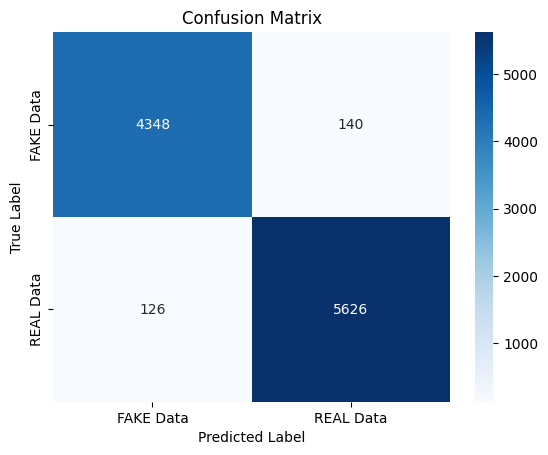

In [294]:
# Heatmap for confusion matrix

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['FAKE Data', 'REAL Data'], yticklabels=['FAKE Data', 'REAL Data'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [297]:
# Function to predict if a statement is fake or real

def predict_statement(statement):
    statement_tfidf = tfidf_vectorizer.transform([statement])
    prediction = pac.predict(statement_tfidf)
    if prediction == 1:
        return "False"
    else:
        return "True"

In [298]:
# Output

Statement = "Study shows that eating apples can lower cholesterol."
prediction = predict_fake_or_real(statement)
print(f"The statement '{Statement}' is predicted as: {prediction}")

The statement 'Study shows that eating apples can lower cholesterol.' is predicted as: True


Conclusion and Insights:

1. Accuracy: 0.97
2. Confusion Matrix:
[[4348  140]
 [ 126 5626]]
3. Output: The statement 'Study shows that eating apples can lower cholesterol.' is predicted as: True